<a href="https://colab.research.google.com/github/Giusgarus/ISPR-assignment/blob/main/ISPR_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![PyTorch](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/640px-PyTorch_logo_black.svg.png)

In [2]:
import torch

print(f"Using torch v{torch.__version__}")

Using torch v2.6.0+cu124


## Tensor Initialization

In [3]:
# Initialize zero dense tensor
dims = (4, 5, 3)
t = torch.zeros(*dims)
print(f"Shape:   {t.shape}")
print(f"Type:    {t.dtype}")
print(f"Layout:  {t.layout}")

Shape:   torch.Size([4, 5, 3])
Type:    torch.float32
Layout:  torch.strided


In [4]:
# Initialize zero sparse tensor
t = torch.zeros(*dims, layout=torch.sparse_coo)
print(f"Shape:   {t.shape}")
print(f"Type:    {t.dtype}")
print(f"Layout:  {t.layout}")

Shape:   torch.Size([4, 5, 3])
Type:    torch.float32
Layout:  torch.sparse_coo


In [5]:
# Random tensor
t1 = torch.randn(*dims) # Normal Distribution
t2 = torch.rand(*dims)  # Uniform Distribution
t3 = torch.randint(-10, 10, dims) # Unif Dist. (Categorical)

print(f"dtype t1: {t1.dtype}")
print(f"dtype t2: {t2.dtype}")
print(f"dtype t3: {t3.dtype}")

dtype t1: torch.float32
dtype t2: torch.float32
dtype t3: torch.int64


In [6]:
# Types are casted by operators
t4 = t1 + t2 * t3
print(f"dtype t4: {t4.dtype}")

dtype t4: torch.float32


In [7]:
# ...or manually casted
torch.random.manual_seed(42)
dims = (3, 2)
t5 = torch.randint(0, 2, dims)
t6 = t5.bool()
t7 = t5.float()
t8 = t5.long()
t9 = t5.double()
print(f"t5 ({t5.dtype}) =\n {t5}")
print(f"t6 ({t6.dtype}) =\n {t6}")
print(f"t7 ({t7.dtype}) =\n {t7}")
print(f"t8 ({t8.dtype}) =\n {t8}")
print(f"t9 ({t9.dtype}) =\n {t9}")

t5 (torch.int64) =
 tensor([[0, 1],
        [0, 0],
        [0, 1]])
t6 (torch.bool) =
 tensor([[False,  True],
        [False, False],
        [False,  True]])
t7 (torch.float32) =
 tensor([[0., 1.],
        [0., 0.],
        [0., 1.]])
t8 (torch.int64) =
 tensor([[0, 1],
        [0, 0],
        [0, 1]])
t9 (torch.float64) =
 tensor([[0., 1.],
        [0., 0.],
        [0., 1.]], dtype=torch.float64)


## Tensors in GPU

In [8]:
if torch.cuda.is_available:
  device = torch.device("cuda")
  devices = list(range(torch.cuda.device_count()))
  if len(devices) > 0:
    device = torch.device(f"cuda:{devices[0]}")
    print(f"Using GPU {device}")
  else:
    device = torch.device("cpu")
    print("CUDA available, but no GPU available")
else:
  print("CUDA is not available")
  device = torch.device("cpu")

device

Using GPU cuda:0


device(type='cuda', index=0)

In [9]:
if device != torch.device("cpu"):
  t1_gpu = t1.to(device)
  t2_gpu = t2.to("cuda")
  t3_gpu = t3.to("cuda:0")

  print(t1_gpu.device, t2_gpu.device, t3_gpu.device)

cuda:0 cuda:0 cuda:0


In [10]:
if device != torch.device("cpu"):
  t4_gpu = t1_gpu + t2_gpu * t3_gpu
  print(t4_gpu.device)

cuda:0


In [11]:
if device != torch.device("cpu"):
  try:
    t4_mixed = t4_gpu + t4
  except RuntimeError as e:
    t4_mixed = None
    print(e)

  assert t4_mixed is None

Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!


## Tensor Indexing

In [12]:
# Create integer range on tensor a with dim (3, 4, 2)
torch.manual_seed(42)
arr = torch.arange(24).reshape(3, 4, 2)

In [13]:
# Index the first two entries on the first dimension
arr[:2]

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]]])

In [14]:
# Index the last two entries on the first dimension
arr[1:]

tensor([[[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]])

In [15]:
# Index the last two entries on the first dimension
arr[-2:]

tensor([[[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]])

In [16]:
# Mixed indexing
arr[1:, 1:3]

tensor([[[10, 11],
         [12, 13]],

        [[18, 19],
         [20, 21]]])

In [17]:
# Mixed indexing
arr[-2:, 1:3, :]

tensor([[[10, 11],
         [12, 13]],

        [[18, 19],
         [20, 21]]])

In [18]:
# Boolean conditions
even_entries = arr % 2 == 0
print(even_entries)
arr[even_entries] = -1
arr

tensor([[[ True, False],
         [ True, False],
         [ True, False],
         [ True, False]],

        [[ True, False],
         [ True, False],
         [ True, False],
         [ True, False]],

        [[ True, False],
         [ True, False],
         [ True, False],
         [ True, False]]])


tensor([[[-1,  1],
         [-1,  3],
         [-1,  5],
         [-1,  7]],

        [[-1,  9],
         [-1, 11],
         [-1, 13],
         [-1, 15]],

        [[-1, 17],
         [-1, 19],
         [-1, 21],
         [-1, 23]]])

## Tensor Reshaping

In [19]:
t = torch.randn(3, 1, 5)
t

tensor([[[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229]],

        [[-0.1863,  2.2082, -0.6380,  0.4617,  0.2674]],

        [[ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890]]])

In [20]:
t.squeeze().shape

torch.Size([3, 5])

In [21]:
t.unsqueeze(0).shape

torch.Size([1, 3, 1, 5])

In [22]:
t.unsqueeze(1).shape

torch.Size([3, 1, 1, 5])

In [23]:
t.unsqueeze(3).shape

torch.Size([3, 1, 5, 1])

In [24]:
t.transpose(1, 2).shape

torch.Size([3, 5, 1])

In [25]:
t.permute(1, 0, 2).shape

torch.Size([1, 3, 5])

## Tensor Reduction

In [26]:
t = torch.randn(5, 2, 3)

In [27]:
red_t = t.sum(0)
print(f"Shape: {red_t.shape}")
red_t

Shape: torch.Size([2, 3])


tensor([[-0.3072,  1.5239,  0.0075],
        [ 2.4961,  1.0065, -1.5828]])

In [28]:
red_t = t.sum(0, keepdim=True)
print(f"Shape: {red_t.shape}")
red_t

Shape: torch.Size([1, 2, 3])


tensor([[[-0.3072,  1.5239,  0.0075],
         [ 2.4961,  1.0065, -1.5828]]])

In [29]:
red_t = t.mean(0)
print(f"Shape: {red_t.shape}")
red_t

Shape: torch.Size([2, 3])


tensor([[-0.0614,  0.3048,  0.0015],
        [ 0.4992,  0.2013, -0.3166]])

In [30]:
red_t = t.mean((0, 2), keepdim=True)
print(f"Shape: {red_t.shape}")
red_t

Shape: torch.Size([1, 2, 1])


tensor([[[0.0816],
         [0.1280]]])

## Tensor Initialization: Your Turn!

In [42]:
def relu_kaiming_init(in_size: int, out_size: int) -> torch.Tensor:
  arr = torch.zeros((out_size, in_size))
  return relu_kaiming_init_(arr)

def relu_kaiming_init_(weights: torch.Tensor):
  fan_in = weights.shape[1]
  gain = torch.sqrt(torch.tensor(6 / fan_in))
  weights.uniform_(-gain, gain)
  return weights


relu_kaiming_init(5, 10)

tensor([[ 0.8375,  0.9092, -0.2566,  1.0063, -0.2400],
        [ 0.2211, -0.5333,  0.6433,  0.9657, -0.8036],
        [ 0.9522,  0.2050,  0.8093,  0.1484,  0.5282],
        [-0.1547,  0.8445,  0.1619, -0.5114,  0.2792],
        [-0.5047, -0.1285, -0.4449,  0.7267, -0.8647],
        [-0.5050, -0.3093, -0.6587,  0.1034, -1.0819],
        [ 0.9893, -0.9305,  0.8457,  0.1823, -0.3557],
        [ 0.6769,  0.1707,  0.8851,  0.1198, -0.3455],
        [ 0.2943, -0.2971,  0.4610,  0.9780,  0.6332],
        [-0.4789,  0.6324,  0.1960,  0.5563, -0.6677]])

In [32]:
# Test test test!
torch.manual_seed(42)

# Right shape
t1 = relu_kaiming_init(5, 10)
assert t1.shape == (10, 5)

# Inplace edit
t2 = torch.zeros(30, 25)
t2_old = t2.clone()
relu_kaiming_init_(t2)
assert not torch.allclose(t2_old, t2)
assert torch.allclose(t2_old, torch.tensor(0.0))

# Mean
print(f"Mean: {t2.mean()}")
print(f"Std: {t2.std()}")

Mean: -0.023608533665537834
Std: 0.28778600692749023


## AutoGrad

In [33]:
t = torch.randn(2, 4, 5)
t.data, t.grad, t.grad_fn

(tensor([[[ 0.9213,  0.5282, -0.0082, -1.4493, -0.6052],
          [-0.1792,  0.1996, -1.2462, -0.4146,  1.4559],
          [ 0.3317, -1.0001, -0.6920, -0.4720, -1.2894],
          [ 1.0763, -1.0667, -1.9893,  0.2973,  0.4345]],
 
         [[ 0.0034, -1.0240,  0.2240, -0.7555, -0.1349],
          [ 0.1488, -0.2378, -0.1014,  0.9077, -0.3669],
          [-0.0186,  0.0285, -1.4314, -0.0398, -0.5003],
          [ 0.2930,  0.1839, -0.7940,  1.3019, -1.0228]]]),
 None,
 None)

In [34]:
import torch

torch.manual_seed(42)
batch_size = 32
in_shape = 5
hh_shape = 10

# Input (Current Step)
x = torch.randn(batch_size, in_shape)
# Hidden Representation (Previous Step)
prev_h = torch.randn(batch_size, hh_shape)

# Computation
W_x = torch.randn(hh_shape, in_shape, requires_grad=True)
i2h = torch.mm(x, W_x.t())
W_h = torch.randn(hh_shape, hh_shape, requires_grad=True)
h2h = torch.mm(prev_h, W_h.t())
next_h = i2h + h2h
next_h = next_h.tanh()

print(next_h.shape)

# Let AutoGrad compute the derivative of tensors requiring grad
print(next_h.backward(torch.ones(batch_size, hh_shape)))

print(f"x.grad: {x.grad}")
print(f"prev_h.grad: {prev_h.grad}")
print(f"W_h.grad ({W_h.grad.shape})\n{W_h.grad}")
print(f"W_x.grad ({W_x.grad.shape})\n{W_x.grad}")


torch.Size([32, 10])
None
x.grad: None
prev_h.grad: None
W_h.grad (torch.Size([10, 10]))
tensor([[ 2.5315e+00,  1.1489e+00, -5.1875e-02,  7.1294e-01,  1.3669e-01,
          2.4356e+00,  1.7606e+00, -1.1490e+00, -3.7367e+00,  1.3773e+00],
        [ 1.8930e-01, -1.2707e+00, -3.3900e+00, -7.2954e-01,  1.8245e+00,
          2.9958e+00,  2.0013e+00, -3.2437e-02, -5.7523e-02,  2.1339e+00],
        [ 6.1874e-01,  1.4638e+00, -1.9598e+00, -2.2327e+00, -3.9282e-01,
          2.6015e+00,  3.0394e-01, -3.0979e+00, -2.1276e-01, -5.4733e-01],
        [ 1.1695e-01, -1.1693e+00,  1.0359e+00, -3.9654e+00,  3.9509e-01,
          3.3311e-01,  6.5937e-01,  5.5830e-01, -2.2075e+00,  2.4853e+00],
        [ 1.3329e+00, -3.3769e-01, -1.4934e-01, -1.8652e+00, -1.0839e-01,
          4.7164e-01,  2.2909e+00,  2.0723e+00,  1.8685e+00, -5.3951e-01],
        [-5.5833e+00, -1.4223e+00, -1.9319e+00,  1.5750e+00, -1.9241e+00,
          1.1815e+00,  1.5489e+00, -1.4915e+00,  5.7945e+00,  8.7710e-01],
        [-8.9498e

## Torch Module

In [35]:
import torch.nn as nn
import torch.nn.functional as F

class ISPR_LinearLayer(nn.Module):
  def __init__(self, in_shape, out_shape, kaiming_custom = False):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(out_shape, in_shape))
    self.bias = nn.Parameter(torch.randn(out_shape))

    if kaiming_custom:
      # Why would this lead to an error without torch.no_grad()?
      with torch.no_grad():
        relu_kaiming_init_(self.weight)
    else:
      # Default PyTorch Version
      nn.init.kaiming_uniform_(self.weight, mode="fan_in", nonlinearity="relu")

    nn.init.zeros_(self.bias)

  def forward(self, in_tensor):
    return in_tensor @ self.weight.t() + self.bias

In [36]:
class ISPR_MultilayerPerceptron(nn.Module):
  def __init__(self,
               layer_size: list[int],
               wrong_list: bool = False):
    """
    Multi-layer Perceptron, where the size
    of each layer is contained in the `layer_size` list.
    """
    super().__init__() #<- remember to call the superclass

    fully_connected = [
        ISPR_LinearLayer(layer_size[i], layer_size[i+1])
        for i in range(len(layer_size) - 1)]

    # Wrong list
    if wrong_list:
      self.fc = fully_connected
    else:
      self.fc = nn.ModuleList(fully_connected)

  def forward(self, x):

    for fc_layer in self.fc:
      x = fc_layer(x)
      x = F.relu(x)

    return x

layers = [5, 10, 20, 1]
net_1 = ISPR_MultilayerPerceptron(layers)
net_2 = ISPR_MultilayerPerceptron(layers, wrong_list=True)

print(f"Net1 parameters: {len(list(net_1.parameters()))}")
print(f"Net2 parameters: {len(list(net_2.parameters()))}")

Net1 parameters: 6
Net2 parameters: 0


## Dataset

In [37]:
# Set seed to generate simulated dataset
torch.manual_seed(42)

n_samples = 1000
x_data = torch.randn(n_samples, 5)
y_data = net_1(x_data) + 1e-2 * torch.randn(n_samples, 1)

# Important! Detach y_data
y_data = y_data.detach()

print(f"x_data shape: {x_data.shape}")
print(f"y_data shape: {y_data.shape}")

# Create dataset
dset = torch.utils.data.TensorDataset(x_data, y_data)

# Split train, val, test (0.7, 0.2, 0.1)
n_train = int(0.7 * n_samples)
n_val = int(0.2 * n_samples)
n_test = n_samples - n_train - n_val

# Split dataset
train_dset, val_dset, test_dset = \
  torch.utils.data.random_split(dset, [n_train, n_val, n_test])

# Create loaders
batch_size = 32
tr_loader = torch.utils.data.DataLoader(train_dset, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dset, batch_size)
test_loader = torch.utils.data.DataLoader(test_dset, batch_size)

# Print lengths
print(f"Train loader length: {len(tr_loader)}")
print(f"Val loader length: {len(val_loader)}")
print(f"Test loader length: {len(test_loader)}")

x_data shape: torch.Size([1000, 5])
y_data shape: torch.Size([1000, 1])
Train loader length: 22
Val loader length: 7
Test loader length: 4


## Training Loop

In [38]:
# Init Module
net_hat = ISPR_MultilayerPerceptron([5, 5, 5, 1])

# Mean Squared Error
loss_fn = nn.MSELoss()

# Stochastic Gradient Descent
optimizer = torch.optim.SGD(net_hat.parameters(), lr=1e-2)

# Training Loop
n_epochs = 500

tr_loss = []
vl_loss = []

for epoch in range(n_epochs):
  # Train
  net_hat.train()
  epoch_tr_loss = []
  for x, y in tr_loader:
    y_hat = net_hat(x)
    loss = loss_fn(y_hat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    epoch_tr_loss.append(loss.item())
  epoch_tr_loss = torch.tensor(epoch_tr_loss)
  epoch_tr_loss = torch.mean(epoch_tr_loss)

  # Validation
  net_hat.eval()
  epoch_val_loss = []
  with torch.no_grad():
    for x, y in val_loader:
      y_hat = net_hat(x)
      loss = loss_fn(y_hat, y)
      epoch_val_loss.append(loss.item())
  epoch_val_loss = torch.tensor(epoch_val_loss)
  epoch_val_loss = torch.mean(epoch_val_loss)

  if epoch % 10 == 0:
    print(f"Epoch. {epoch} | Train Loss: {epoch_tr_loss} | Val Loss: {epoch_val_loss}")

  tr_loss.append(epoch_tr_loss.item())
  vl_loss.append(epoch_val_loss.item())

Epoch. 0 | Train Loss: 2.408891201019287 | Val Loss: 1.7388951778411865
Epoch. 10 | Train Loss: 0.48262080550193787 | Val Loss: 0.566037654876709
Epoch. 20 | Train Loss: 0.28131791949272156 | Val Loss: 0.3381621539592743
Epoch. 30 | Train Loss: 0.18660692870616913 | Val Loss: 0.23684652149677277
Epoch. 40 | Train Loss: 0.15966500341892242 | Val Loss: 0.210013285279274
Epoch. 50 | Train Loss: 0.1476651132106781 | Val Loss: 0.1957404613494873
Epoch. 60 | Train Loss: 0.1386399269104004 | Val Loss: 0.19127266108989716
Epoch. 70 | Train Loss: 0.13173657655715942 | Val Loss: 0.19019483029842377
Epoch. 80 | Train Loss: 0.12505604326725006 | Val Loss: 0.17553851008415222
Epoch. 90 | Train Loss: 0.11778971552848816 | Val Loss: 0.17259517312049866
Epoch. 100 | Train Loss: 0.11172189563512802 | Val Loss: 0.1597665548324585
Epoch. 110 | Train Loss: 0.10599798709154129 | Val Loss: 0.1508783996105194
Epoch. 120 | Train Loss: 0.10005590319633484 | Val Loss: 0.13807035982608795
Epoch. 130 | Train Loss

In [39]:
# Test Set Performance
net_hat.eval()
test_loss = []
with torch.no_grad():
  for x, y in test_loader:
    y_hat = net_hat(x)
    loss = loss_fn(y_hat, y)
    test_loss.append(loss.item())
test_loss = torch.tensor(test_loss)
test_loss = torch.mean(test_loss).item()
print(f"Test Loss: {test_loss}")

Test Loss: 0.07435428351163864


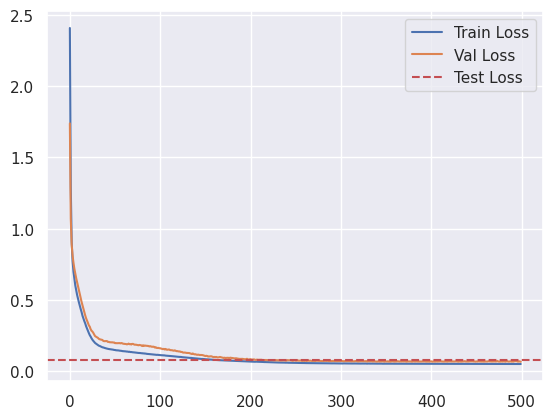

In [40]:
# Seaborn plot training loss and validation loss
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

sns.lineplot(x=range(n_epochs), y=tr_loss, label="Train Loss")
sns.lineplot(x=range(n_epochs), y=vl_loss, label="Val Loss")
# Plot horizontal line for test loss
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.legend()
plt.show()

## Your Turn!

1. Download the MNIST dataset using [torchvision](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html).
2. Instantiate a Convolutional Neural Network (CNN)
3. Train the CNN to classify the digits.

In [41]:
import torchvision
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F

# Seed
torch.manual_seed(42)

# Load Dataset
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

mnist_train = torchvision.datasets.MNIST(
    'data/', train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(
    'data/', train=False, download=True, transform=transform)


# TODO: Use GPU?

# TODO: Split MNIST Train and Validation

# TODO: Create data loaders

# TODO: Define class CNN

# TODO: Instantiate CNN

# TODO: Train the CNN

# TODO: Test Set Performance

# TODO: Plot Training Loss and Validation Loss (W&B, TensorBoard, or plain Matplotlib)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.54MB/s]
